In [ ]:
# Part 1 - Data Preprocessing

In [1]:


# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [2]:
# Importing the dataset
dataset = pd.read_csv('Churn-Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]


In [3]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [4]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

In [5]:
## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

In [6]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [7]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
# Part 2 - Now let's make the ANN!

In [10]:


# Importing the Keras libraries and packages
import keras
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LeakyReLU,PReLU,ELU
from keras.layers import Dropout


In [11]:
# Initialising the ANN
classifier = Sequential()

In [14]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu',input_dim = 11))


In [15]:
# Adding the second hidden layer
classifier.add(Dense(6, kernel_initializer = 'he_uniform',activation='relu'))
# Adding the output layer
classifier.add(Dense(1, kernel_initializer = 'glorot_uniform', activation = 'sigmoid'))

In [16]:
# Compiling the ANN
classifier.compile(optimizer = 'Adamax', loss = 'binary_crossentropy', metrics = ['accuracy'])


In [18]:
# Fitting the ANN to the Training set
model_history=classifier.fit(X_train, y_train,validation_split=0.33, batch_size = 10, epochs = 100)


Epoch 1/100
536/536 [==============================] - 13s 6ms/step - loss: 0.5517 - accuracy: 0.7666 - val_loss: 0.5149 - val_accuracy: 0.7925
Epoch 2/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4920 - accuracy: 0.7957 - val_loss: 0.4812 - val_accuracy: 0.7970
Epoch 3/100
536/536 [==============================] - 2s 5ms/step - loss: 0.4649 - accuracy: 0.8005 - val_loss: 0.4621 - val_accuracy: 0.7993
Epoch 4/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4479 - accuracy: 0.8046 - val_loss: 0.4502 - val_accuracy: 0.8023
Epoch 5/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4365 - accuracy: 0.8091 - val_loss: 0.4419 - val_accuracy: 0.8042
Epoch 6/100
536/536 [==============================] - 3s 5ms/step - loss: 0.4278 - accuracy: 0.8145 - val_loss: 0.4354 - val_accuracy: 0.8084
Epoch 7/100
536/536 [==============================] - 2s 4ms/step - loss: 0.4207 - accuracy: 0.8197 - val_loss: 0.4304 - val_accuracy: 0.812

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


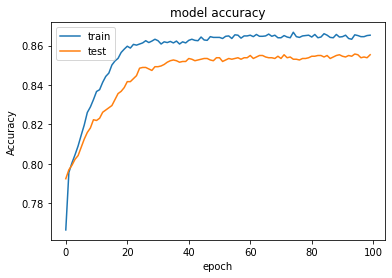

In [21]:
# list all data in history

print(model_history.history.keys())
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

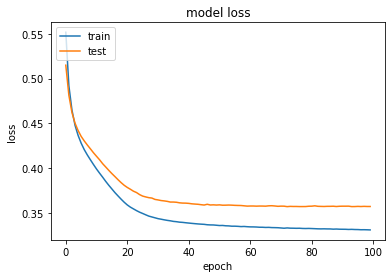

In [22]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# Part 3 - Making the predictions and evaluating the model

In [23]:
# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)


In [24]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [29]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
print("Accuracy score of the model is : ",score)

Accuracy score of the model is :  0.8615
